In [1]:
import csv
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from qucumber.nn_states import DensityMatrix
from qucumber.nn_states import ComplexWaveFunction
from qucumber.callbacks import MetricEvaluator
import qucumber.utils.unitaries as unitaries
import qucumber.utils.training_statistics as ts
import qucumber.utils.cplx as cplx
import qucumber.utils.data as data
from qucumber.observables import ObservableBase, to_pm1
from qucumber.observables.pauli import flip_spin
import qucumber

from qulacs.gate import Pauli

In [62]:
dm_train_depolarizing_df = pd.read_csv("./density_matrix/model_n_pattern_shot=1000_depolarizing.csv")
dm_train_unitary_df = pd.read_csv("./density_matrix/model_n_pattern_shot=1000_unitary.csv")
dm_train_depolarizing_unitary_df = pd.read_csv("./density_matrix/model_n_pattern_shot=1000_depolarizing&unitary.csv")

sv_train_depolarizing_df = pd.read_csv("./state_vector/model_n_pattern_shot=1000_depolarizing.csv")
sv_train_unitary_df = pd.read_csv("./state_vector/model_n_pattern_shot=1000_unitary.csv")
sv_train_depolarizing_unitary_df = pd.read_csv("./state_vector/model_n_pattern_shot=1000_depolarizing&unitary.csv")

mev_train_depolarizing_df = pd.read_csv("./max_eigen_vector/model_n_pattern_shot=1000_depolarizing.csv")
mev_train_unitary_df = pd.read_csv("./max_eigen_vector/model_n_pattern_shot=1000_unitary.csv")
mev_train_depolarizing_unitary_df = pd.read_csv("./max_eigen_vector/model_n_pattern_shot=1000_depolarizing&unitary.csv")

## depolarizing error

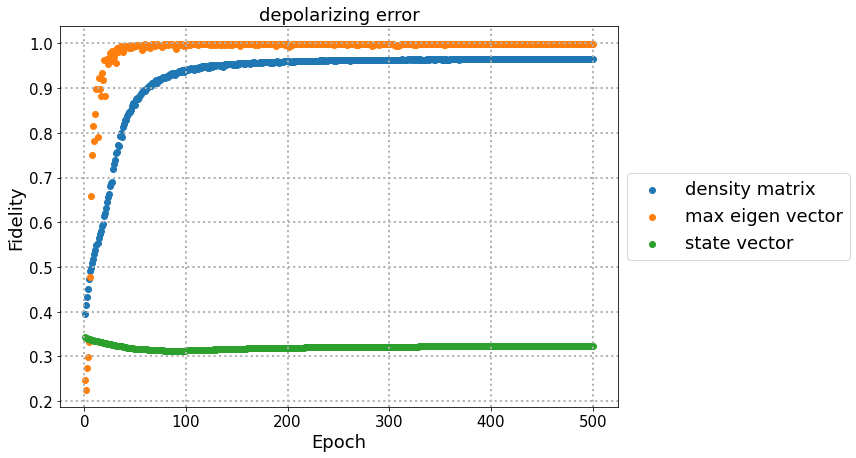

In [58]:
x = np.arange(1, 501)
tick_label = np.arange(1, 501).astype("str")
labels = ["density matrix", "max eigen vector", "state vector"]

plt.figure(figsize=(10, 7))
plt.scatter(x, dm_train_depolarizing_df["Fidelity"].values)
plt.scatter(x, mev_train_depolarizing_df["Fidelity"].values)
plt.scatter(x, sv_train_depolarizing_df["Fidelity"].values)

plt.title('depolarizing error', fontsize=18)
#plt.yscale('log')
plt.xlabel("Epoch", fontsize=18)
plt.ylabel('Fidelity', fontsize=18)
plt.tick_params(labelsize=15)
plt.grid(linestyle='dotted', linewidth=2)
plt.legend(labels, loc='center left', bbox_to_anchor=(1., .5), fontsize=18)
plt.savefig("./figures/fidelity_depolarizing.pdf", bbox_inches='tight')

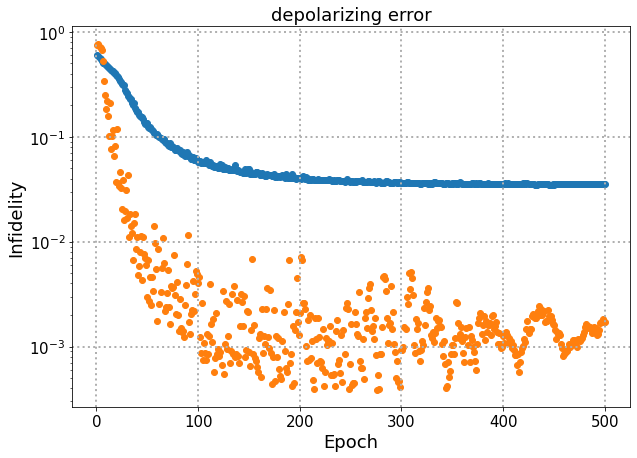

In [72]:
x = np.arange(1, 501)
tick_label = np.arange(1, 501).astype("str")
labels = ["density matrix", "max eigen vector", "state vector"]

plt.figure(figsize=(10, 7))
plt.scatter(x, 1-dm_train_depolarizing_df["Fidelity"].values)
plt.scatter(x, 1-mev_train_depolarizing_df["Fidelity"].values)
#plt.scatter(x, 1-sv_train_depolarizing_df["Fidelity"].values)

plt.title('depolarizing error', fontsize=18)
plt.yscale('log')
plt.xlabel("Epoch", fontsize=18)
plt.ylabel('Infidelity', fontsize=18)
plt.tick_params(labelsize=15)
plt.grid(linestyle='dotted', linewidth=2)
#plt.legend(labels, loc='center left', bbox_to_anchor=(1., .5), fontsize=18)
plt.savefig("./figures/infidelity_depolarizing.pdf", bbox_inches='tight')

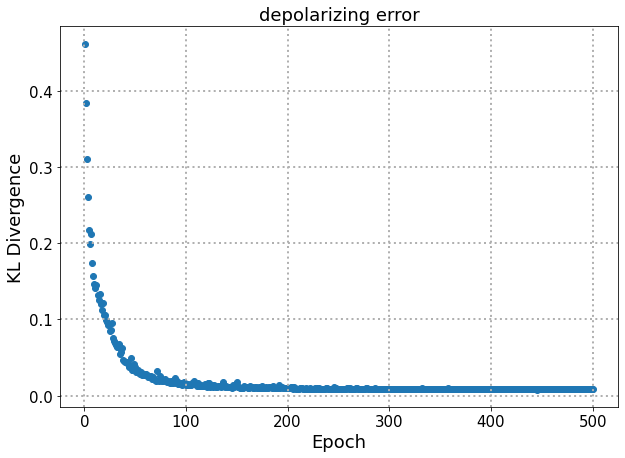

In [73]:
x = np.arange(1, 501)
tick_label = np.arange(1, 501).astype("str")
labels = ["density matrix", "max eigen vector", "state vector"]

plt.figure(figsize=(10, 7))
plt.scatter(x, dm_train_depolarizing_df["KL_Divergence"].values)
#plt.scatter(x, mev_train_depolarizing_df["KL_Divergence"].values)
#plt.scatter(x, sv_train_depolarizing_df["KL_Divergence"].values)

plt.title('depolarizing error', fontsize=18)
#plt.yscale('log')
plt.xlabel("Epoch", fontsize=18)
plt.ylabel('KL Divergence', fontsize=18)
plt.tick_params(labelsize=15)
plt.grid(linestyle='dotted', linewidth=2)
#plt.legend(labels, loc='center left', bbox_to_anchor=(1., .5), fontsize=18)
plt.savefig("./figures/kl_divergence_depolarizing.pdf", bbox_inches='tight')

## unitary error

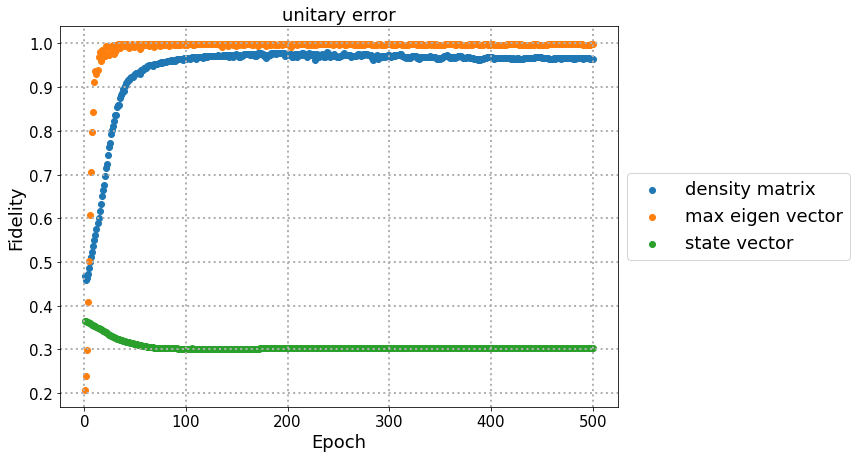

In [63]:
x = np.arange(1, 501)
tick_label = np.arange(1, 501).astype("str")
labels = ["density matrix", "max eigen vector", "state vector"]

plt.figure(figsize=(10, 7))
plt.scatter(x, dm_train_unitary_df["Fidelity"].values)
plt.scatter(x, mev_train_unitary_df["Fidelity"].values)
plt.scatter(x, sv_train_unitary_df["Fidelity"].values)

plt.title('unitary error', fontsize=18)
#plt.yscale('log')
plt.xlabel("Epoch", fontsize=18)
plt.ylabel('Fidelity', fontsize=18)
plt.tick_params(labelsize=15)
plt.grid(linestyle='dotted', linewidth=2)
plt.legend(labels, loc='center left', bbox_to_anchor=(1., .5), fontsize=18)
plt.savefig("./figures/fidelity_unitary.pdf", bbox_inches='tight')

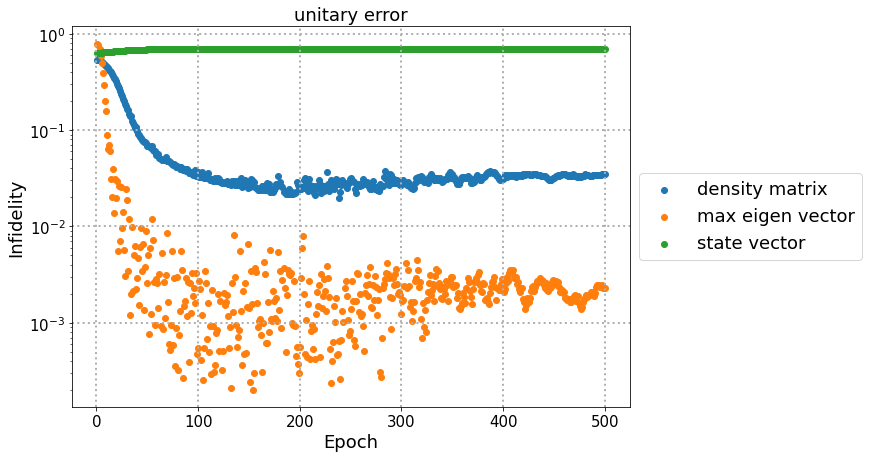

In [64]:
x = np.arange(1, 501)
tick_label = np.arange(1, 501).astype("str")
labels = ["density matrix", "max eigen vector", "state vector"]

plt.figure(figsize=(10, 7))
plt.scatter(x, 1-dm_train_unitary_df["Fidelity"].values)
plt.scatter(x, 1-mev_train_unitary_df["Fidelity"].values)
plt.scatter(x, 1-sv_train_unitary_df["Fidelity"].values)

plt.title('unitary error', fontsize=18)
plt.yscale('log')
plt.xlabel("Epoch", fontsize=18)
plt.ylabel('Infidelity', fontsize=18)
plt.tick_params(labelsize=15)
plt.grid(linestyle='dotted', linewidth=2)
plt.legend(labels, loc='center left', bbox_to_anchor=(1., .5), fontsize=18)
plt.savefig("./figures/infidelity_unitary.pdf", bbox_inches='tight')

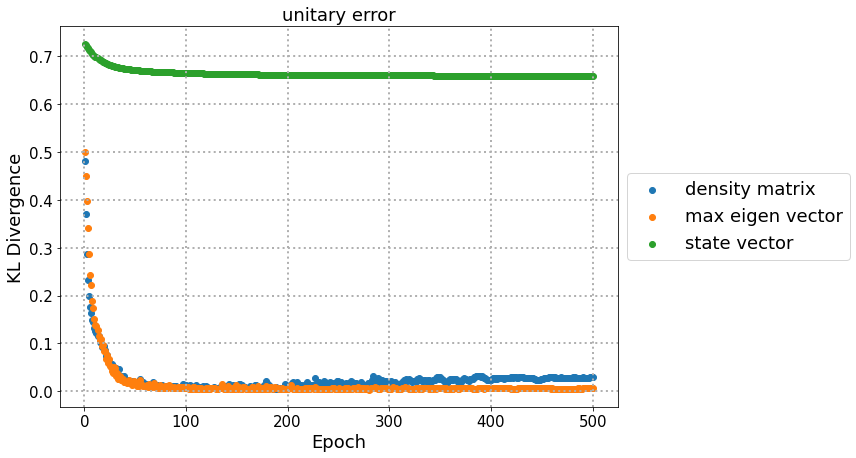

In [65]:
x = np.arange(1, 501)
tick_label = np.arange(1, 501).astype("str")
labels = ["density matrix", "max eigen vector", "state vector"]

plt.figure(figsize=(10, 7))
plt.scatter(x, dm_train_unitary_df["KL_Divergence"].values)
plt.scatter(x, mev_train_unitary_df["KL_Divergence"].values)
plt.scatter(x, sv_train_unitary_df["KL_Divergence"].values)

plt.title('unitary error', fontsize=18)
#plt.yscale('log')
plt.xlabel("Epoch", fontsize=18)
plt.ylabel('KL Divergence', fontsize=18)
plt.tick_params(labelsize=15)
plt.grid(linestyle='dotted', linewidth=2)
plt.legend(labels, loc='center left', bbox_to_anchor=(1., .5), fontsize=18)
plt.savefig("./figures/kl_divergence_unitary.pdf", bbox_inches='tight')

## depolarizing & unitary

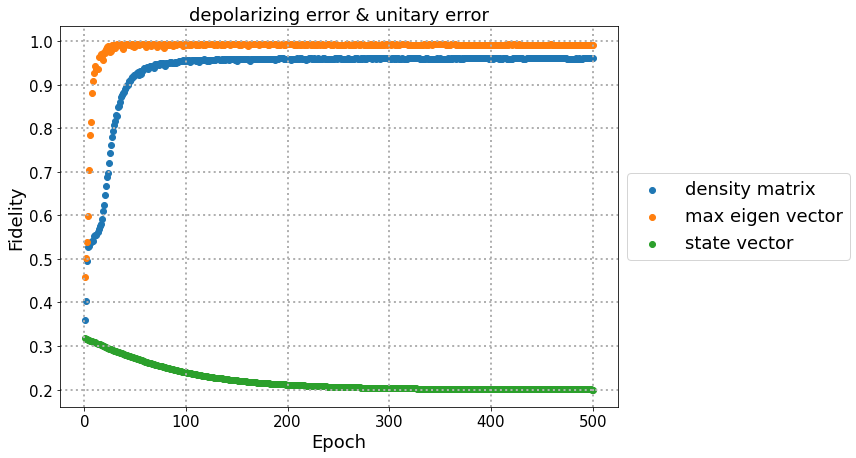

In [66]:
x = np.arange(1, 501)
tick_label = np.arange(1, 501).astype("str")
labels = ["density matrix", "max eigen vector", "state vector"]

plt.figure(figsize=(10, 7))
plt.scatter(x, dm_train_depolarizing_unitary_df["Fidelity"].values)
plt.scatter(x, mev_train_depolarizing_unitary_df["Fidelity"].values)
plt.scatter(x, sv_train_depolarizing_unitary_df["Fidelity"].values)

plt.title('depolarizing error & unitary error', fontsize=18)
#plt.yscale('log')
plt.xlabel("Epoch", fontsize=18)
plt.ylabel('Fidelity', fontsize=18)
plt.tick_params(labelsize=15)
plt.grid(linestyle='dotted', linewidth=2)
plt.legend(labels, loc='center left', bbox_to_anchor=(1., .5), fontsize=18)
plt.savefig("./figures/fidelity_depolarizing&unitary.pdf", bbox_inches='tight')

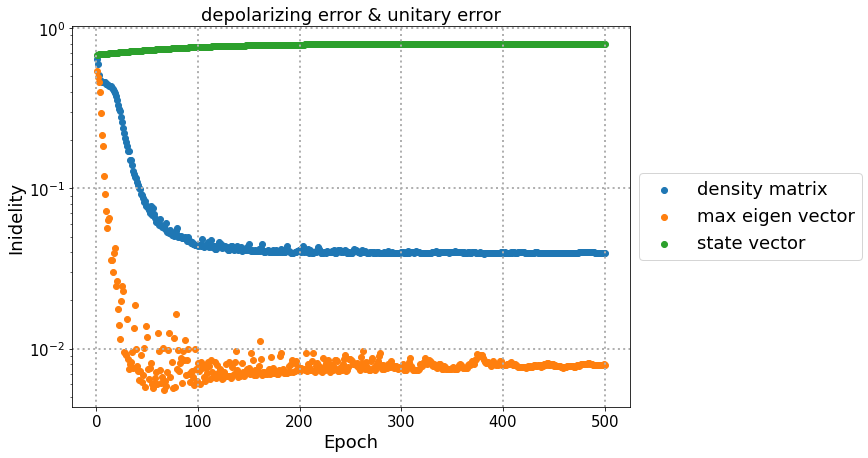

In [67]:
x = np.arange(1, 501)
tick_label = np.arange(1, 501).astype("str")
labels = ["density matrix", "max eigen vector", "state vector"]

plt.figure(figsize=(10, 7))
plt.scatter(x, 1-dm_train_depolarizing_unitary_df["Fidelity"].values)
plt.scatter(x, 1-mev_train_depolarizing_unitary_df["Fidelity"].values)
plt.scatter(x, 1-sv_train_depolarizing_unitary_df["Fidelity"].values)

plt.title('depolarizing error & unitary error', fontsize=18)
plt.yscale('log')
plt.xlabel("Epoch", fontsize=18)
plt.ylabel('Inidelity', fontsize=18)
plt.tick_params(labelsize=15)
plt.grid(linestyle='dotted', linewidth=2)
plt.legend(labels, loc='center left', bbox_to_anchor=(1., .5), fontsize=18)
plt.savefig("./figures/infidelity_depolarizing&unitary.pdf", bbox_inches='tight')

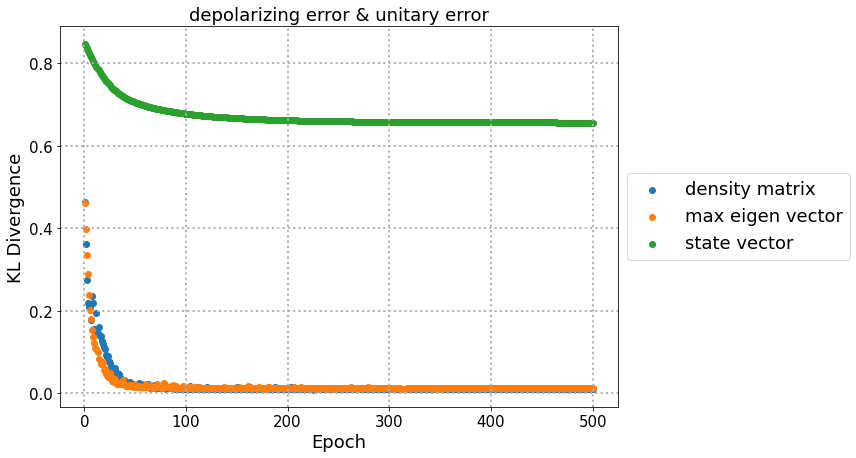

In [68]:
x = np.arange(1, 501)
tick_label = np.arange(1, 501).astype("str")
labels = ["density matrix", "max eigen vector", "state vector"]

plt.figure(figsize=(10, 7))
plt.scatter(x, dm_train_depolarizing_unitary_df["KL_Divergence"].values)
plt.scatter(x, mev_train_depolarizing_unitary_df["KL_Divergence"].values)
plt.scatter(x, sv_train_depolarizing_unitary_df["KL_Divergence"].values)

plt.title('depolarizing error & unitary error', fontsize=18)
#plt.yscale('log')
plt.xlabel("Epoch", fontsize=18)
plt.ylabel('KL Divergence', fontsize=18)
plt.tick_params(labelsize=15)
plt.grid(linestyle='dotted', linewidth=2)
plt.legend(labels, loc='center left', bbox_to_anchor=(1., .5), fontsize=18)
plt.savefig("./figures/kl_divergence_depolarizing&unitary.pdf", bbox_inches='tight')